# Data analytics - Energy Demand Forecasting 

Electricty consumption- what do people need at a point in time and how is demand growing - some consideration to look at in demand forecasting,for individuals,household ,businesses, commercials, factories and other whole range of organisations that have sort of different energy demand profiles. the main idea is performing forcasting over what timeframe for example over an hour in future, day, week, month, year ..... for instance if you think of the government that is deciding the supply that they gonna need to meet the energy requirement, so they have to make forecast of how much demand, there is no reason to generate double of electricity thats needed at some point in future because storing electricity is really difficulty. we can also look at the link between demand and weather, seasonality, peak scenarios(and to make sure that there is supply for that peak to make sure that those customers that need much electricity are not disappointed since there is more technologies say like more tech devices that consume electricity). we can look at history and make future projections. once you have these accurate obsevations you can start looking at different interventions that government can make with in country. we can now use data to influence economic policies and at the end fo these project we will be able to know which variables that are likey to influence electricity demand.

# Why electricity demand forecasts?

•Demand is important for estimating capacity required to avoid black-outs  
• Control of generation and distribution 
• Ability to make informed decisions 
• Reduce risks and minimise costs  
• Implementation depends on the forecast horizon: 
– Short-term: ensuring system stability 
– Medium-term: maintenance scheduling 
– Long-term: capital planning  
• Required for studying electricity prices 
• Design of efficient electricity markets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,pairwise_distances,roc_curve,roc_auc_score,r2_score,mean_squared_error
plt.style.use('seaborn')
import statsmodels.api as sm
import warnings
import datetime as dt
from datetime import date
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter("ignore")

# 1. Historical intraday demand data can be used to study human behavior and seasonality in activity. Download the EirGrid intraday 15-minute energy demand data for the year 2014 from Canvas and save the data as a csv file with three columns for Date, Time, and Demand. Note the null values in the spreadsheet. Load the EirGrid system demand data into your computer. Fix day-light saving issues and missing values using linear interpolation. Plot and carefully label the time series of energy demand during 2014.

In [2]:
EGSDemand2014 = pd.read_csv('EirGridSystemDemand2014.csv')

In [3]:
EGSDemand2014

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0
...,...,...,...
35035,12/31/2014,22:45,2779.0
35036,12/31/2014,23:00,2876.0
35037,12/31/2014,23:15,2961.0
35038,12/31/2014,23:30,2957.0


In [4]:
EGSDemand2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    35040 non-null  object 
 1   Time    35040 non-null  object 
 2   Demand  35035 non-null  float64
dtypes: float64(1), object(2)
memory usage: 821.4+ KB


In [5]:
EGSDemand2014['Date'] = pd.to_datetime(EGSDemand2014['Date'], format='%m/%d/%Y')

In [6]:
tim=[]
for t in EGSDemand2014['Time']:
    ti=str(t)+':00'
    tim.append(ti)

In [7]:
mydatetim=[]
for (dat, ti) in zip(EGSDemand2014['Date'],tim):
    mydatetim.append(dat.strftime('%m/%d/%Y')+" "+ti)

In [8]:
EGSDemand2014['Datetime']=mydatetim

In [9]:
EGSDemand2014['Datetime']= pd.to_datetime(EGSDemand2014['Datetime'],format='%m/%d/%Y %H:%M:%S')

In [10]:
EGSDemand2014

,Date,Time,Demand,Datetime
0,2014-01-01,0:00,2899.0,2014-01-01 00:00:00
1,2014-01-01,0:15,2869.0,2014-01-01 00:15:00
2,2014-01-01,0:30,2827.0,2014-01-01 00:30:00
3,2014-01-01,0:45,2787.0,2014-01-01 00:45:00
4,2014-01-01,1:00,2724.0,2014-01-01 01:00:00
...,...,...,...,...
35035,2014-12-31,22:45,2779.0,2014-12-31 22:45:00
35036,2014-12-31,23:00,2876.0,2014-12-31 23:00:00
35037,2014-12-31,23:15,2961.0,2014-12-31 23:15:00
35038,2014-12-31,23:30,2957.0,2014-12-31 23:30:00


In [11]:
#interpolating data
EGSDemand2014= EGSDemand2014.interpolate(method='linear', limit_direction='forward')

In [12]:
EGSDemand2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      35040 non-null  datetime64[ns]
 1   Time      35040 non-null  object        
 2   Demand    35040 non-null  float64       
 3   Datetime  35040 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.1+ MB


In [13]:
EGSDemand2014=EGSDemand2014.set_index('Datetime')

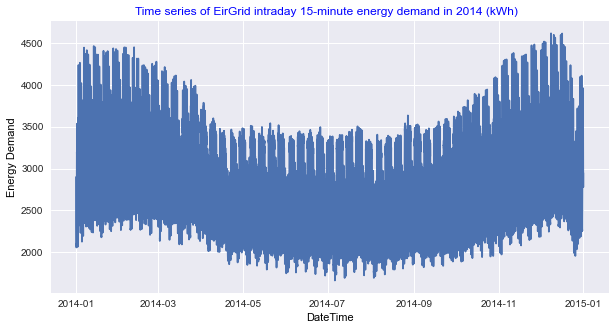

In [14]:
#plotting EGSDemand2014 time series
plt.figure(figsize=(10, 5))
plt.plot(EGSDemand2014["Demand"])
plt.ylabel("Energy Demand", color='black')
plt.xlabel("DateTime", color='black')
plt.title("Time series of EirGrid intraday 15-minute energy demand in 2014 (kWh)  ", color='blue')
plt.show()            

Despite daily fluctuations, The energy demand time series shows that demand tends to be generally high at the beginning of year till the end of march, and then the demand becomes slightly low in the middle of the year starting from april to september and then rise to its pick again. these rise and fall in energy demand might be as a results individual/corporate activities. 

# 2. Estimate autocorrelation coefficients for 10 days and plot the autocorrelation against the lag with axis labelled in days. Comment on the shape of the plot.

Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags.

It measures a set of current values against a set of past values and finds whether they correlate.
It is the correlation of one-time series data to another time series data which has a time lag.
It varies from +1 to -1
Application of Autocorrelation:  

Pattern recognition.
Signal detection.
Signal processing.
Estimating pitch.
Technical analysis of stocks.

<Figure size 2160x1440 with 0 Axes>

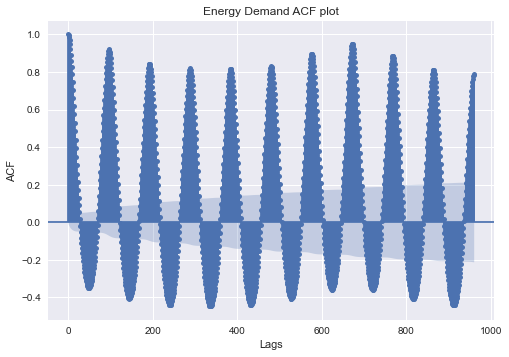

In [15]:
# plot the auto correlation
plt.figure(figsize=(30, 20))
fig = tsaplots.plot_acf((EGSDemand2014["Demand"]).dropna(),lags=960)
plt.title("Energy Demand ACF plot")
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

The autocorrelation function plot shows that there is sigficantly high interdependence between values of energy demand at time (t) and their lags at (t-1). Generally those autocorrelations coefficients that are very high for example from 0.8 comfirms that the correlation between today's demand values and prior values is higher. There is also a repeating pattern of seasonality that is dipicted by these positive and negative fluctuations. 

# 3. Create a time of year variable that ranges between 0 and 1 and show how the demand varies over the course of the year using a graphic.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#:~:text=Transform%20features%20by%20scaling%20each,e.g.%20between%20zero%20and%20one.

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
EGSDemand2014['Date_0:1']=scaler.fit(np.array(EGSDemand2014['Date']).reshape(-1,1)).transform(np.array(EGSDemand2014['Date']).reshape(-1,1))

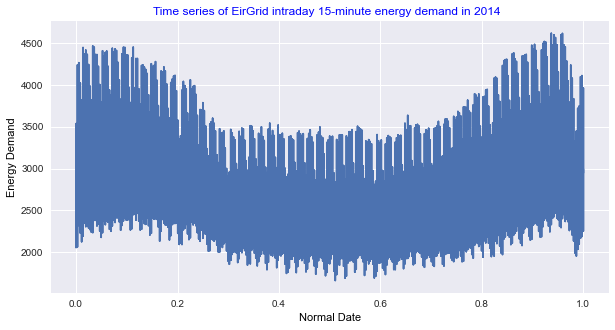

In [17]:
#plotting EGSDemand2014 time series
plt.figure(figsize=(10, 5))
plt.plot(EGSDemand2014['Date_0:1'],EGSDemand2014["Demand"])
plt.ylabel("Energy Demand", color='black')
plt.xlabel("Normal Date", color='black')
plt.title("Time series of EirGrid intraday 15-minute energy demand in 2014  ", color='blue')
plt.show()

This graph shows the variation of energy demand from January(0) to December(1) in 2014. It highlights significantly high energy demand around January till the beginning of April, followed by a constant low demand that starts around April till September and then a high demand throughout the rest of the year. This variation might be caused by a number of factors such as weather conditions, vacations of employees in factories and many more  

# 4. For each of the 12 months of the year, calculate the average demand and display them as a bar chart, and label them appropriately.

In [18]:
EGSDemand2014=EGSDemand2014.reset_index()

In [19]:
monthlydemand=EGSDemand2014.groupby(EGSDemand2014['Datetime'].dt.strftime('%m'))['Demand'].mean()

In [20]:
months=list(monthlydemand.keys())
Mdemand=list(monthlydemand.values)

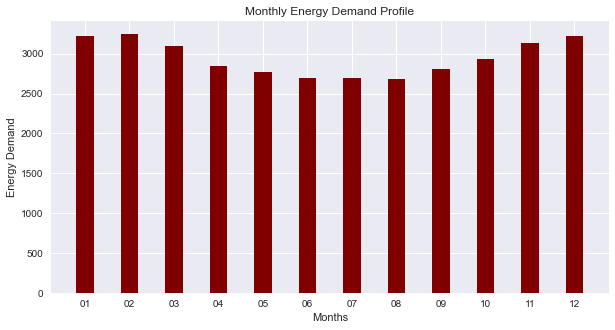

In [21]:
fig = plt.figure(figsize = (10, 5))
plt.bar(months, Mdemand, color ='maroon',width = 0.4)
plt.xlabel("Months")
plt.ylabel("Energy Demand")
plt.title("Monthly Energy Demand Profile")
plt.show()

The variance in energy demand from January (0) to December (1) in 2014 is depicted in this graph. It shows a period of significantly high energy demand from January to the beginning of April, followed by a period of consistently low demand from April to September, and then a period of consistently high demand for the rest of the year. This fluctuation could be caused by a variety of variables, including weather conditions, factory employee vacations, and so on.

# 5. For each of the 24 hours of the day, calculate the average demand and display them as a bar chart, indicating the different hours of the day. This graphic is often referred to as the daily demand profile.

In [22]:
hourlydemand=EGSDemand2014.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [23]:
hours=list(hourlydemand.keys())
Hdemand=list(hourlydemand.values)

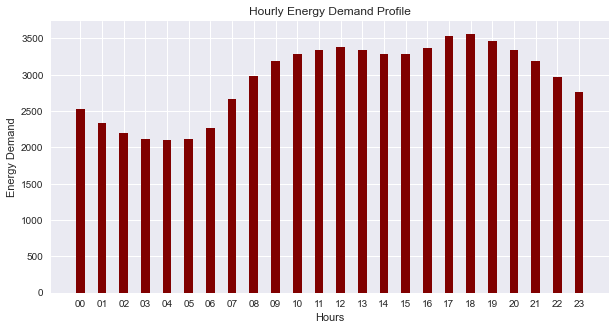

In [24]:
fig = plt.figure(figsize = (10, 5))
plt.bar(hours, Hdemand, color ='maroon',width = 0.4)
plt.xlabel("Hours")
plt.ylabel("Energy Demand")
plt.title("Hourly Energy Demand Profile")
plt.show()

The graph above depicts hourly energy demand profile in 2014. it show that the energy requiremend is low at night(22h-7h) and then high throughout a day. this is basically due to fact that many activities stop at night.

# 6. For each of the seven days of the week, calculate the average demand and display them as a bar chart. Does the result make sense based on intuition about electricity consumption?

In [25]:
dailydemand=EGSDemand2014.groupby(EGSDemand2014['Datetime'].dt.strftime('%u'))['Demand'].mean()

In [26]:
days=list(dailydemand.keys())
Ddemand=list(dailydemand.values)

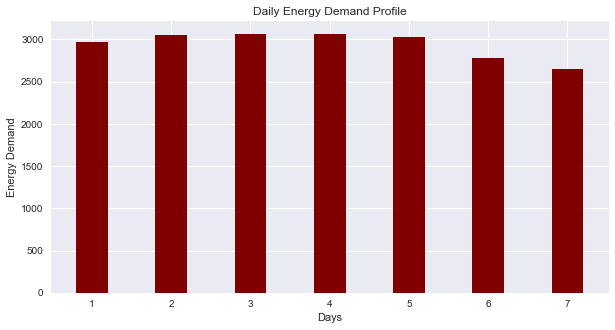

In [27]:
fig = plt.figure(figsize = (10, 5))
plt.bar(days, Ddemand, color ='maroon',width = 0.4)
plt.xlabel("Days")
plt.ylabel("Energy Demand")
plt.title("Daily Energy Demand Profile")
plt.show()

This graph illustrates daily energy demand profile in 2014. It shows that their significantly higher demand over the working days which compared to weekends. This reduction in weekend is due to the fact that many employees don't go to work and ofcourse many activities do not open.

# 7. Calculate a daily demand profile for each day of the week. This can be achieved by selecting a specific hour for each day and computing the average. Show the results on a graphic with a separate profile curve for each day

In [28]:
#Define a list with the name of the days of a week named day_name

In [29]:
EGSDemand2014['Days']=EGSDemand2014['Datetime'].dt.weekday

In [30]:
monday_demand=EGSDemand2014[EGSDemand2014['Days']==0]
monday_hourlydemand=monday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [31]:
tuesday_demand=EGSDemand2014[EGSDemand2014['Days']==1]
tuesday_hourlydemand=tuesday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [32]:
wednesday_demand=EGSDemand2014[EGSDemand2014['Days']==2]
wednesday_hourlydemand=wednesday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [33]:
thursday_demand=EGSDemand2014[EGSDemand2014['Days']==3]
thursday_hourlydemand=thursday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [34]:
friday_demand=EGSDemand2014[EGSDemand2014['Days']==4]
friday_hourlydemand=friday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [35]:
saturday_demand=EGSDemand2014[EGSDemand2014['Days']==5]
saturday_hourlydemand=saturday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

In [36]:
sunday_demand=EGSDemand2014[EGSDemand2014['Days']==6]
sunday_hourlydemand=sunday_demand.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()

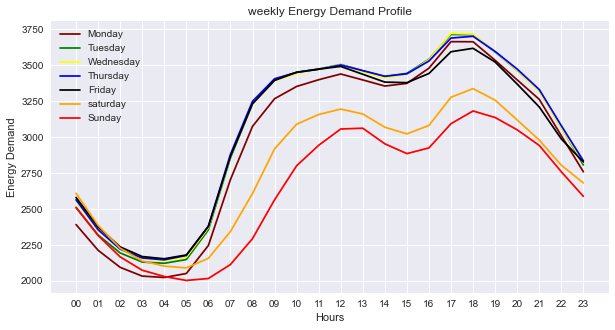

In [37]:
fig = plt.figure(figsize = (10, 5))
plt.plot(hours, list(monday_hourlydemand.values), color ='maroon',label='Monday')
plt.plot(hours, list(tuesday_hourlydemand.values), color ='green',label='Tuesday')
plt.plot(hours, list(wednesday_hourlydemand.values), color ='yellow',label='Wednesday')
plt.plot(hours, list(thursday_hourlydemand.values), color ='blue',label='Thursday')
plt.plot(hours, list(friday_hourlydemand.values), color ='black',label='Friday')
plt.plot(hours, list(saturday_hourlydemand.values), color ='orange',label='saturday')
plt.plot(hours, list(sunday_hourlydemand.values), color ='red',label='Sunday')
plt.xlabel("Hours")
plt.ylabel("Energy Demand")
plt.title("weekly Energy Demand Profile")
plt.legend()
plt.show()

The graph above shows a snapshot of weekly energy demand profile across 24 hours of a day in 2014. it clearly show low energy demand over night hours and a significant rise of demand in a day time, also it clearly shows that the energy demand is significantly row on saturday and sunday compared to other working days.

# 8. Is there a statistically significant difference between demand during the weekend (Saturday and Sunday) and during the working week (Monday through Friday)? Perform a statistical hypothesis test, such as a t-test, in order to reach a conclusion.

In [38]:
workingweekdata=EGSDemand2014[EGSDemand2014['Days']<5]  #data<5
weekenddata=EGSDemand2014[EGSDemand2014['Days']>=5]   #data>=5
#not needed for now
#workingweek_hourlydemand=workingweekdata.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean()
#weekend_hourlydemand=workingweekdata.groupby(EGSDemand2014['Datetime'].dt.strftime('%H'))['Demand'].mean() 

In [39]:
from scipy import stats
import statsmodels.api as sm
stats.ttest_ind(workingweekdata['Demand'],weekenddata['Demand'])
#t-test

Ttest_indResult(statistic=46.54684714308395, pvalue=0.0)

Null hypothesis: Energy demand distribution in working days is equal to the energy demand over the weekend.
Here we reject null hypothesis since p-value of (0.0) is less that alpha(0.05).
That means there is a significant difference between energy consumption during working days and weekends.

# 9. Divide the data into two halves and use the second half for evaluation purposes. Study the simple benchmark forecasting approach known as persistence. For data that does not change much from one time step to the next, we can assume that the most recent observation is a good forecast of the future. The forecast issued at time t for k periods ahead is simply given by y_hat(t+k) = y(t). Calculate the mean absolute error (MAE) and plot it against forecast horizons for lead times up to one day ahead.

In [40]:
lenghth2=len(EGSDemand2014)/2
half1=EGSDemand2014[0:int(lenghth2)]
half2=EGSDemand2014[int(lenghth2):]

In [41]:
#horizons to forecast
forecasthorizons=list(range(1,97))
#Mean Absolute Error
MAE_persistance=[]
for i in forecasthorizons:
    # Calculate the predicted presistance benchmark
    #Persistance benchmark is crucial in time series analysis.
    persistance=EGSDemand2014['Demand'].shift(i).fillna(0)
    persistence2=persistance[ int(len(persistance)/2): ]
    
    #Mean Absolute Error
    Mean_absolute_error=mean_absolute_error(half2['Demand'],persistence2)
    MAE_persistance.append(Mean_absolute_error)

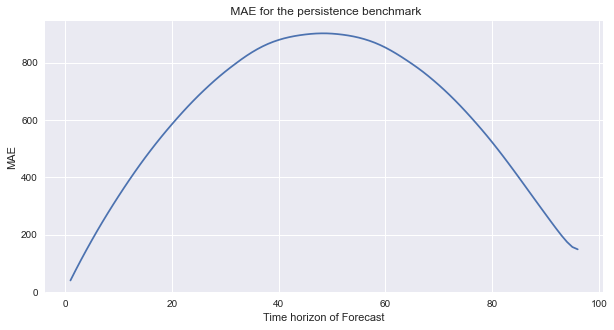

In [42]:
#Plot MAE for the persistence benchmark 
fig = plt.figure(figsize = (10, 5))
plt.plot(forecasthorizons,MAE_persistance)
plt.title(' MAE for the persistence benchmark')
plt.xlabel('Time horizon of Forecast')
plt.ylabel('MAE')
plt.show()

This graph above depicts the forecast of persistance benchmark mean absolute error across 24 hours timeframe. it reveals that the more we predict to the close time horizons we are likely to get accurate forecast than when we predict far time horizons. Again there is a point that we react (in the middle of a graph) and start repeating a similar pattern, here at that point, the error again decrease evenif we are forecasting data points that are far from the basis. finally the graph shows a repeatitive pattern at 96th time horizon that means for example if our basis was 12am and at the end of graph it is going to be 12am which entails that the model is gonna be accurate because of repeatability of magnitude of demand over a day.

# 10. Calculate the mean absolute percentage error for the persistence and plot this against the forecast horizon up to one day ahead. Discuss and explain the shapes of the curves showing performance against forecast horizons.

In [43]:
MAPE_persistance=[]
for i in forecasthorizons:
    # Calculate the predicted presistance benchmark
    persistance=EGSDemand2014['Demand'].shift(i).fillna(0)
    persistence2=persistance[ int(len(persistance)/2): ]
    
    #Mean Absolute Percentage Error
    Mean_absolute_percentage_error=mean_absolute_percentage_error(half2['Demand'],persistence2)
    MAPE_persistance.append(Mean_absolute_percentage_error)

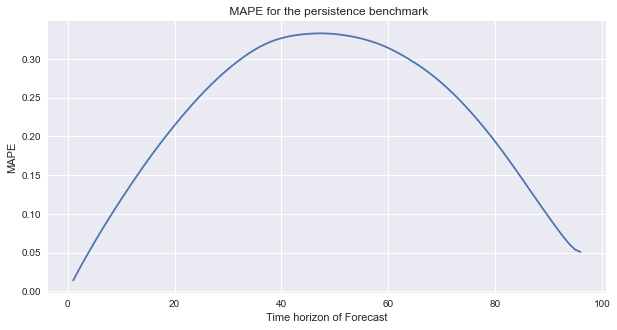

In [44]:
#Plot MAPE for the persistence benchmark 
fig = plt.figure(figsize = (10, 5))
plt.plot(forecasthorizons,MAPE_persistance)
plt.title(' MAPE for the persistence benchmark')
plt.xlabel('Time horizon of Forecast')
plt.ylabel('MAPE')
plt.show()

This graph above depicts the forecast of persistance benchmark *mean absolute percentage error* across 24 hours timeframe. it reveals that the more we predict to the close time horizons we are likely to get accurate forecast than when we predict far time horizons. Again there is a point that we react (in the middle of a graph) and start repeating a similar pattern, here at that point, the error again decrease evenif we are forecasting data points that are far from the basis. finally the graph shows a repeatitive pattern at 96th time horizon that means for example if our basis was 12am and at the end of graph it is going to be 12am which entails that the model is gonna be accurate because of repeatability of magnitude of demand over a day.